# Fatal Encounters for Jan, 2000 to June, 2020.
This notebook shows the data analysis of fatal encounter dataset from https://fatalencounters.org

First, we extract dataset by reading csv file(fatal_encounter_dot_org.csv).
And count the number of case(occurs) group by year.  

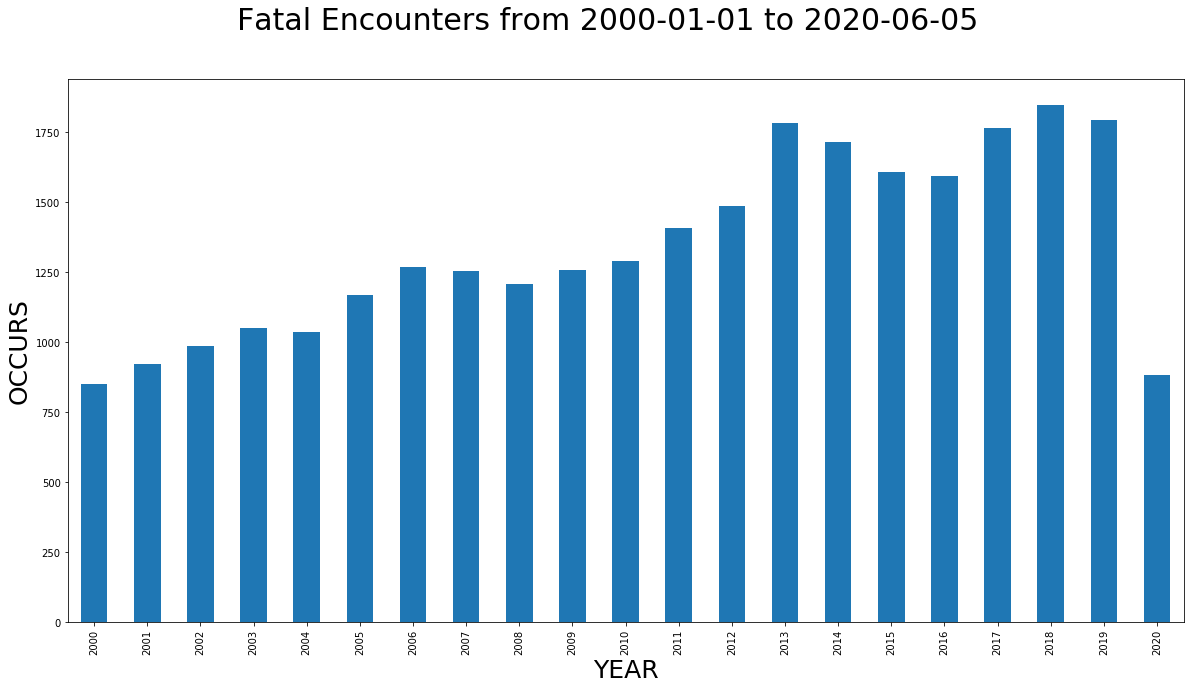

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('fatal_encounters_dot_org.csv')
df1 = df[['age','gender','race','date','city','state','zipcode','county','lat','lon','cause','de','mental','year']]
dyear=df1['year'].value_counts()
plt.figure(figsize=(20,10))
s = dyear.sort_index().plot.bar()
plt.xlabel('YEAR',fontsize=25)
plt.ylabel('OCCURS',fontsize=25)
plt.suptitle('Fatal Encounters from 2000-01-01 to 2020-06-05',fontsize=30)
plt.show()

Note: this chart indicated that the last 2 years in 2018 and 2019 are high cases in US.

Second, we count the number of case(occurs) and group by state.  

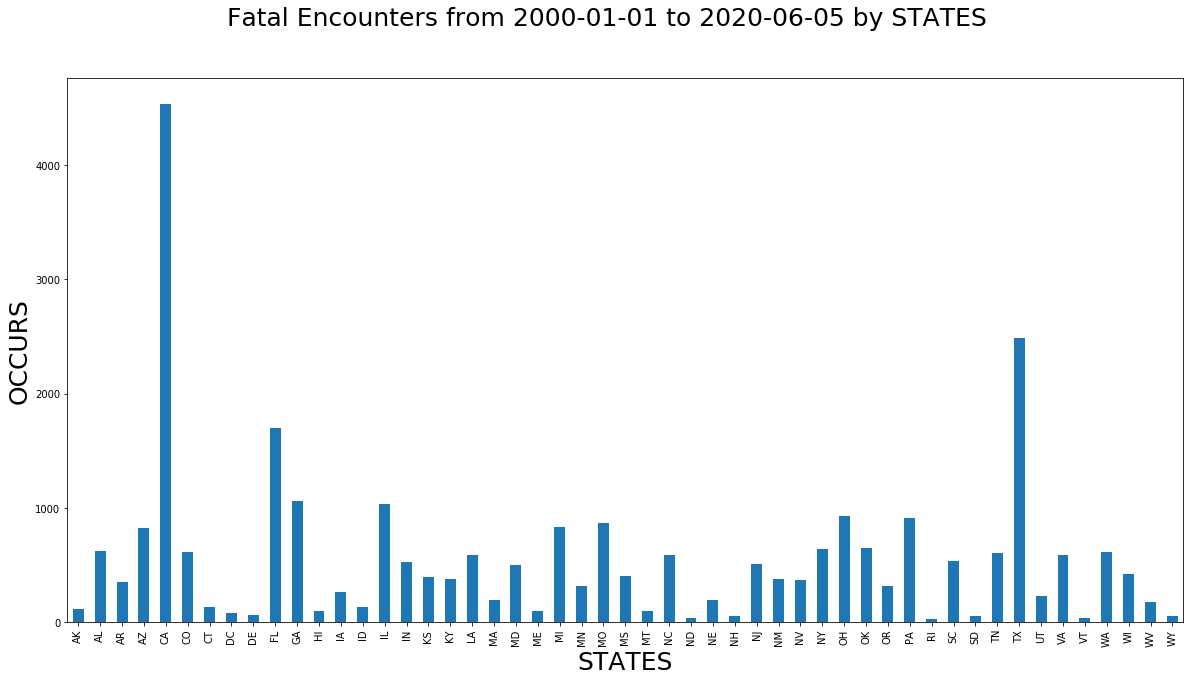

In [2]:
dstate=df1['state'].value_counts()
plt.figure(figsize=(20,10))
s = dstate.sort_index().plot.bar()
plt.xlabel('STATES',fontsize=25)
plt.ylabel('OCCURS',fontsize=25)
plt.suptitle('Fatal Encounters from 2000-01-01 to 2020-06-05 by STATES',fontsize=25)
plt.show()

Note: we found the significant 3 states that have highest in US. 
    1. California
    2. Texas
    3. Florida

# Black Lives Matter (BLM)

BlackLivesMatter was founded in 2013 in response to the acquittal of Trayvon Martin’s murderer. Black Lives Matter Foundation, Inc is a global organization in the US, UK, and Canada, whose mission is to eradicate white supremacy and build local power to intervene in violence inflicted on Black communities by the state and vigilantes. By combating and countering acts of violence, creating space for Black imagination and innovation, and centering Black joy. 

from(https://blacklivesmatter.com/about/)

We want to study how BLM changed the fatal encounters records. Hence the rest of this notebook will present and analysis dataset before BLM(2000 to 2013), and after BLM(2014 to present).

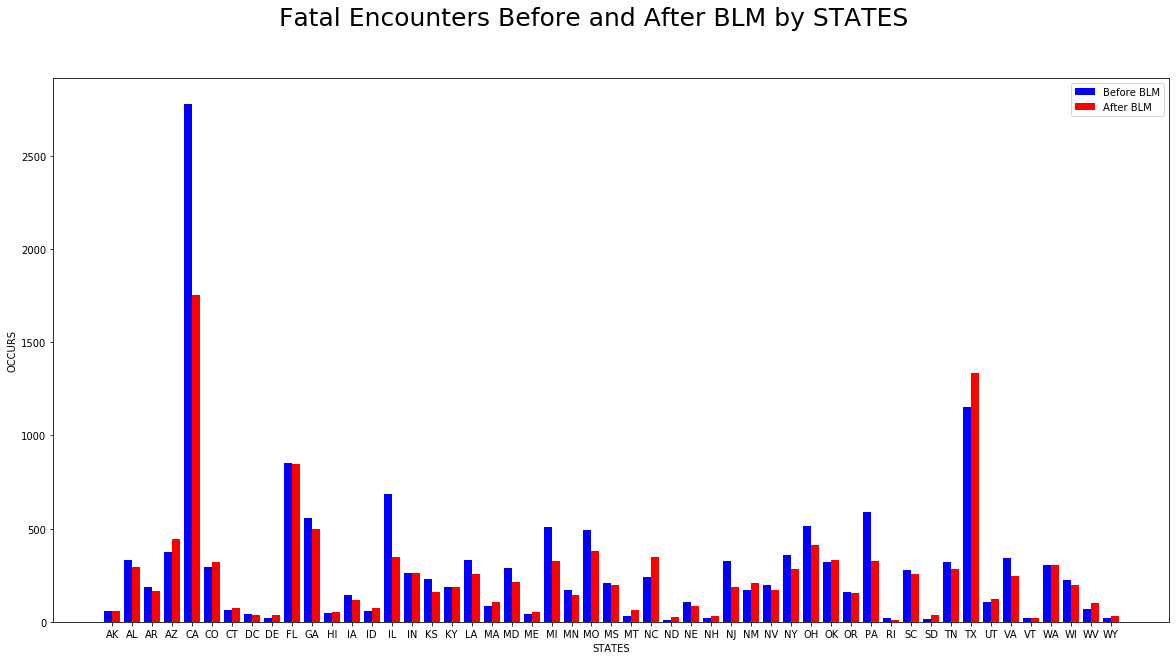

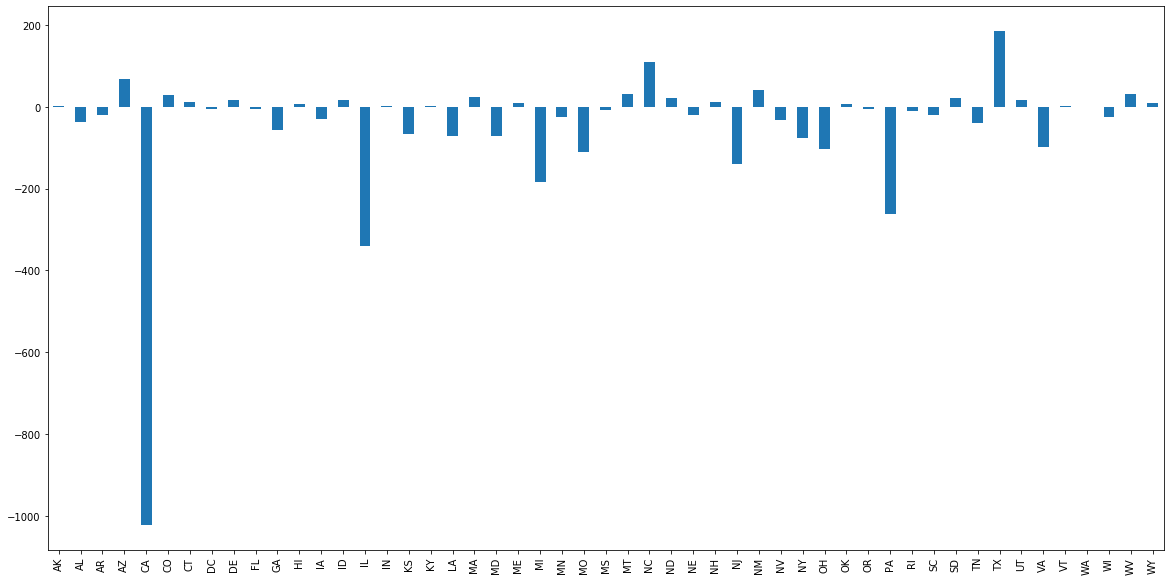

In [3]:
bfblm=df1.loc[(df1['year'] < 2013)]
bfstate=bfblm['state'].value_counts()
afblm=df1.loc[(df1['year'] >= 2013)]
afstate=afblm['state'].value_counts()
bf=bfstate.sort_index()
af=afstate.sort_index()
plt.figure(figsize=(20,10))
plt.suptitle('Fatal Encounters Before and After BLM by STATES',fontsize=25)
ax=plt.subplot(111)
ind = np.arange(len(bf))  # the x locations for the groups
width = 0.4#0.5       # the width of the bars
plbf=ax.bar(ind,bf,width, color='b', align='center')
plaf=ax.bar(ind+width,af, width, color='r', align='center')
ax.set_ylabel('OCCURS')
ax.set_xlabel('STATES')
ax.set_xticks(ind+(width)/2)
ax.set_xticklabels(af.index)
ax.legend((plbf[0], plaf[0]),('Before BLM', 'After BLM'))
plt.show()
diff=(af-bf)
plt.figure(figsize=(20,10))
s = diff.sort_index().plot.bar()
plt.show()

In [ ]:
Note: the significant 3 states that have highest before and after BLM are  
    1. California
    2. Texas
    3. Florida

The 5 Highest increasing and decreasing cases states show in below:

In [4]:
print('5 Highest Increasing States')
print(diff.nlargest())
print('5 Highest Decreasing States')
print(diff.nsmallest())

5 Highest Increasing States
TX    185
NC    110
AZ     68
NM     40
MT     32
Name: state, dtype: int64
5 Highest Decreasing States
CA   -1023
IL    -339
PA    -261
MI    -183
NJ    -139
Name: state, dtype: int64


Note: from this table and "Fatal Encounters Before and After BLM chart", we found all significant 3 states as 
    1. California is the highest decreasing cases in US.
    2. Texas is the highest increasing cases in US.
    3. Florida is the highest cases that not change in US.
    
Analysis: There are some coincidences about American politics in 3 states. California is blue state, Texas is red state and Florida is swing state. If we use the politics point of view to conclude the results. It is a rough analysis and not enough information to support this conclusion. Hence we will dig in the significant 3 states to discover the main reason about the number of fatal encounters cases and answer the issue about politics.

Reference:
"Since the 2000 United States presidential election, red states and blue states have referred to states of the United States whose voters predominantly choose either the Republican Party (red) or Democratic Party (blue) presidential candidates."
from Red states and blue states (https://en.wikipedia.org/wiki/Red_states_and_blue_states)

"In American politics, the term swing state (or battleground state) refers to any state that could reasonably be won by either the Democratic or Republican presidential candidate by a swing in votes."
from Swing state (https://en.wikipedia.org/wiki/Swing_state)

In [ ]:
#Todo

In [ ]:
#Todo

# Police killed 1004 people in 2019. Black people were 24% of those killed despite being only 13% of the population. 

from https://killedbypolice.net 

Next, we will present about demographic information in fatal encounters such as ages, genders, races.

AGEs Before BLM
   less than 19:  1182
     19  to  30:  5564
     31  to  47:  5595
     48  to  60:  1827
greater than 60:  589

AGEs After BLM
   less than 19:  772
     19  to  30:  4223
     31  to  47:  4839
     48  to  60:  1867
greater than 60:  757


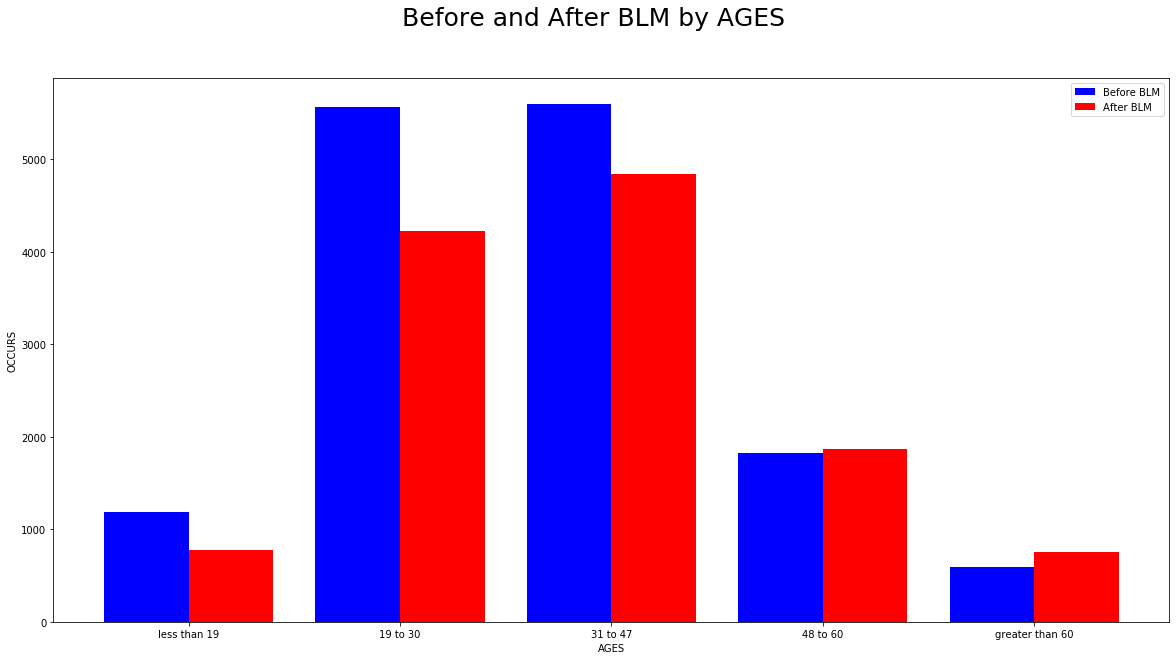

In [5]:
bfblm.fillna(method='ffill')
temp=bfblm.loc[bfblm['age'].notnull()]
temp=temp.loc[temp['age'].notnull()]
age=temp['age'].astype(int)
a18=age.where(age < 19)
a19_30=age.where((age>18) & (age<31))
a31_47=age.where((age>30) & (age<48))
a48_60=age.where((age>47) & (age<61))
a61=age.where(age > 60)
a18=a18.value_counts(dropna=True)
a19_30=a19_30.value_counts(dropna=True)
a31_47=a31_47.value_counts(dropna=True)
a48_60=a48_60.value_counts(dropna=True)
a61=a61.value_counts(dropna=True)
print('AGEs Before BLM')
print('   less than 19: ',a18.sum())
print('     19  to  30: ',a19_30.sum())
print('     31  to  47: ',a31_47.sum())
print('     48  to  60: ',a48_60.sum())
print('greater than 60: ',a61.sum())
age_bfblm=[a18.sum(),a19_30.sum(),a31_47.sum(),a48_60.sum(),a61.sum()]

afblm.fillna(method='ffill')
temp=afblm.loc[afblm['age'].notnull()]
temp=temp.loc[temp['age'].notnull()]
age=temp['age'].astype(int)
a18=age.where(age < 19)
a19_30=age.where((age>18) & (age<31))
a31_47=age.where((age>30) & (age<48))
a48_60=age.where((age>47) & (age<61))
a61=age.where(age > 60)
a18=a18.value_counts(dropna=True)
a19_30=a19_30.value_counts(dropna=True)
a31_47=a31_47.value_counts(dropna=True)
a48_60=a48_60.value_counts(dropna=True)
a61=a61.value_counts(dropna=True)
print()
print('AGEs After BLM')
print('   less than 19: ',a18.sum())
print('     19  to  30: ',a19_30.sum())
print('     31  to  47: ',a31_47.sum())
print('     48  to  60: ',a48_60.sum())
print('greater than 60: ',a61.sum())
age_afblm=[a18.sum(),a19_30.sum(),a31_47.sum(),a48_60.sum(),a61.sum()]

plt.figure(figsize=(20,10))
plt.suptitle('Before and After BLM by AGES',fontsize=25)
ax=plt.subplot(111)
ind = np.arange(len(age_bfblm))  # the x locations for the groups
width = 0.4#0.5       # the width of the bars
plbf=ax.bar(ind,age_bfblm,width, color='b', align='center')
plaf=ax.bar(ind+width,age_afblm, width, color='r', align='center')
ax.set_ylabel('OCCURS')
ax.set_xlabel('AGES')
ax.set_xticks(ind+(width)/2)
ax.set_xticklabels(['less than 19','19 to 30','31 to 47','48 to 60','greater than 60'])
ax.legend((plbf[0], plaf[0]),('Before BLM', 'After BLM'))
plt.show()

Note: the higher age is between 19 to 47 years old. And after BLM that age range is decreasing.

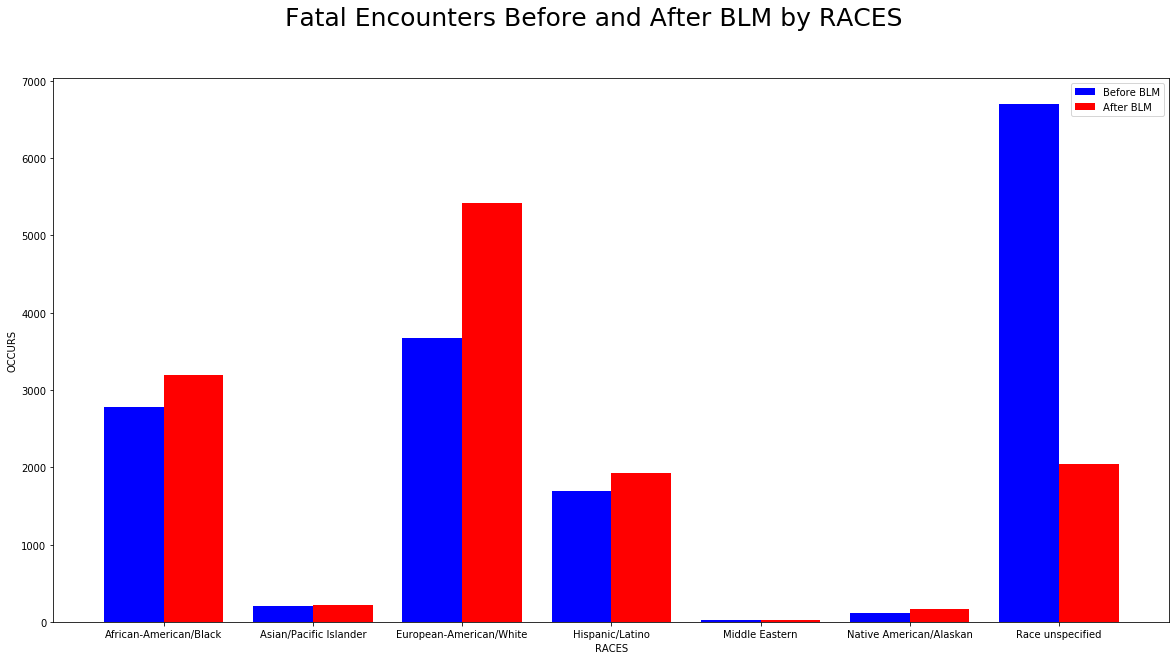

The Difference between Before BLM and After
African-American/Black      415
Asian/Pacific Islander        4
European-American/White    1749
Hispanic/Latino             231
Middle Eastern                6
Native American/Alaskan      52
Race unspecified          -4660
Name: race, dtype: int64


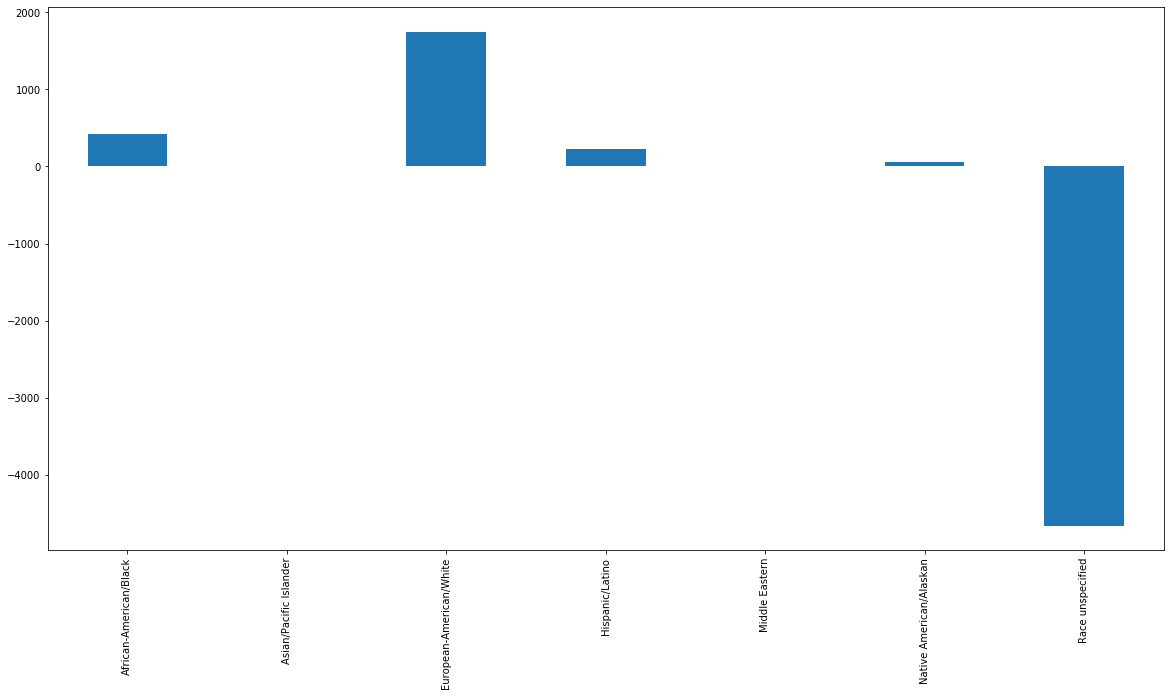

In [6]:
temp=bfblm.loc[bfblm['race'].notnull()]
bfrace=temp['race'].value_counts()
temp=afblm.loc[afblm['race'].notnull()]
afrace=temp['race'].value_counts()
bf=bfrace.sort_index()
af=afrace.sort_index()
plt.figure(figsize=(20,10))
plt.suptitle('Fatal Encounters Before and After BLM by RACES',fontsize=25)
ax=plt.subplot(111)
ind = np.arange(len(bf))  # the x locations for the groups
width = 0.4#0.5       # the width of the bars
plbf=ax.bar(ind,bf,width, color='b', align='center')
plaf=ax.bar(ind+width,af, width, color='r', align='center')
ax.set_ylabel('OCCURS')
ax.set_xlabel('RACES')
ax.set_xticks(ind+(width)/2)
ax.set_xticklabels(af.index)
ax.legend((plbf[0], plaf[0]),('Before BLM', 'After BLM'))
plt.show()
diff=(af-bf)
print('The Difference between Before BLM and After')
print(diff)
plt.figure(figsize=(20,10))
s = diff.sort_index().plot.bar()
plt.show()

Note: the highest races is white people, and follow with black people. The interesting of this chart is the number of race unspecified is significantly decreasing after BLM. We assumed that the police intend to gather, record, and minimize the missing information after BLM. 

Test of Homogeneity, we presented the homogeneity test of age populations. 

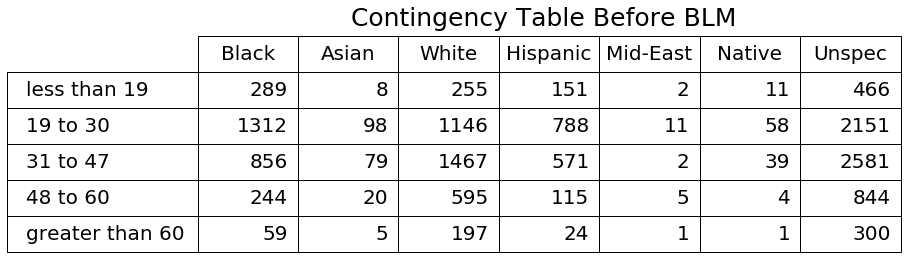

Chi-Square =  496.5530632956418
p-value =  8.661752032454184e-90
df =  24
we can reject the null hypothesis. There is definitely some sort of relationship between ages and races


In [9]:
temp=bfblm.groupby(['age','race']).size()
minage=int(bfblm['age'].min())
maxage=int(bfblm['age'].max())
dic=temp.to_dict()
racetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age18cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age61cnt[j]+=dic[(float(i),racetxt[j])]            

fig=plt.figure()
plt.suptitle('Contingency Table Before BLM',fontsize=25)
fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
#Test for Independence
f_obs = np.array(table_vals)
[x,pval,df]=stats.chi2_contingency(f_obs)[0:3]
print('Chi-Square = ',x)
print('p-value = ',pval)
print('df = ',df)
if pval<0.05:
    print('we can reject the null hypothesis. There is definitely some sort of relationship between ages and races')
else:
    print('we cannot reject the null hypothesis. There is independent between age and race.')

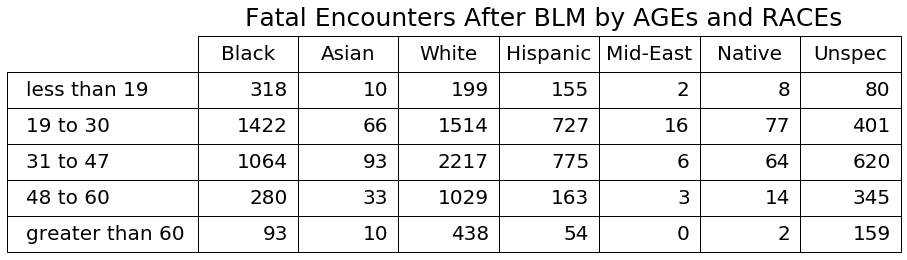

Chi-Square =  821.9931588165709
p-value =  4.669498821522967e-158
df =  24
we can reject the null hypothesis. There is definitely some sort of relationship between ages and races


In [10]:
temp=afblm.groupby(['age','race']).size()
minage=int(afblm['age'].min())
maxage=int(afblm['age'].max())
dic=temp.to_dict()
racetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age18cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age61cnt[j]+=dic[(float(i),racetxt[j])]            

fig=plt.figure()
plt.suptitle('Fatal Encounters After BLM by AGEs and RACEs',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
#Test for Independence
f_obs = np.array(table_vals)
[x,pval,df]=stats.chi2_contingency(f_obs)[0:3]
print('Chi-Square = ',x)
print('p-value = ',pval)
print('df = ',df)
if pval<0.05:
    print('we can reject the null hypothesis. There is definitely some sort of relationship between ages and races')
else:
    print('we cannot reject the null hypothesis. There is independent between age and race.')

Note: the data analysis that we found so far, is "it is not homogenity of age populations" 

Next, we will show the classify by genders.

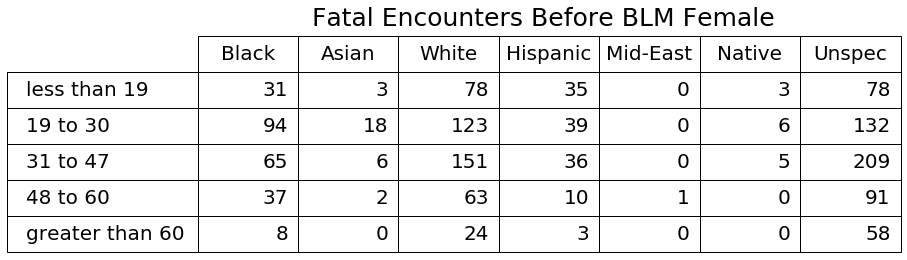

African-American/Black  =  16.678495386799145 %
Asian/Pacific Islander  =  2.0581973030518097 %
European-American/White  =  31.156848828956708 %
Hispanic/Latino  =  8.729595457771469 %
Middle Eastern  =  0.07097232079488999 %
Native American/Alaskan  =  0.99361249112846 %
Race unspecified  =  40.312278211497514 %


In [11]:
bf_female=bfblm.loc[bfblm['gender'] == 'Female']
temp=bf_female.groupby(['age','race']).size()
minage=int(bf_female['age'].min())
maxage=int(bf_female['age'].max())
dic=temp.to_dict()
fullracetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age18cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age61cnt[j]+=dic[(float(i),fullracetxt[j])]            

fig=plt.figure()
plt.suptitle('Fatal Encounters Before BLM Female',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
sumage=[]
sumrac=[0]*7
bf_female_percent=[0]*7
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(fullracetxt)):
    print(fullracetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    bf_female_percent[i]=(sumrac[i]/sum(sumrac))*100

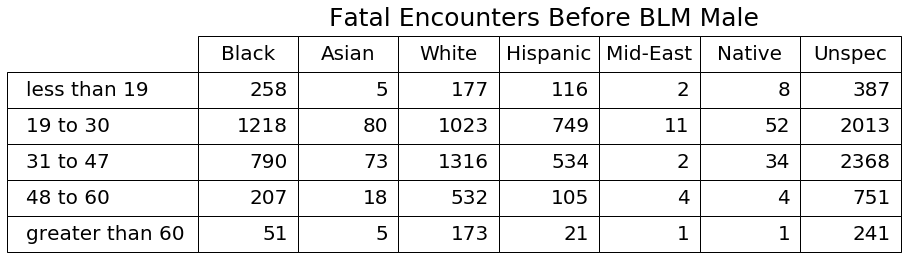

African-American/Black  =  18.934733683420855 %
Asian/Pacific Islander  =  1.3578394598649661 %
European-American/White  =  24.163540885221305 %
Hispanic/Latino  =  11.440360090022505 %
Middle Eastern  =  0.15003750937734434 %
Native American/Alaskan  =  0.7426856714178545 %
Race unspecified  =  43.21080270067517 %


In [12]:
bf_male=bfblm.loc[bfblm['gender'] == 'Male']
temp=bf_male.groupby(['age','race']).size()
minage=int(bf_male['age'].min())
maxage=int(bf_male['age'].max())
dic=temp.to_dict()
fullracetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age18cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age61cnt[j]+=dic[(float(i),fullracetxt[j])]            

fig=plt.figure()
plt.suptitle('Fatal Encounters Before BLM Male',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
sumage=[]
sumrac=[0]*7
bf_male_percent=[0]*7
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(fullracetxt)):
    print(fullracetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    bf_male_percent[i]=(sumrac[i]/sum(sumrac))*100

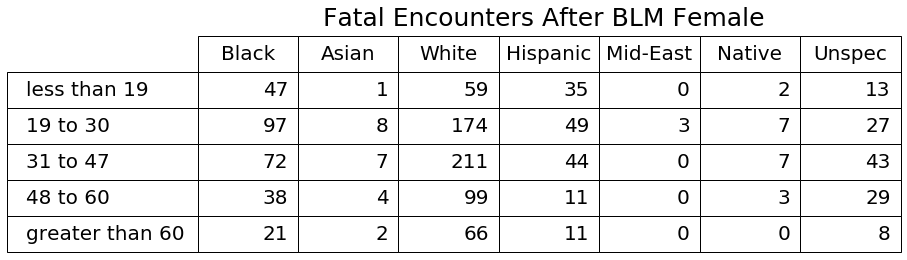

African-American/Black  =  22.95492487479132 %
Asian/Pacific Islander  =  1.8363939899833055 %
European-American/White  =  50.8347245409015 %
Hispanic/Latino  =  12.520868113522537 %
Middle Eastern  =  0.25041736227045075 %
Native American/Alaskan  =  1.5859766277128546 %
Race unspecified  =  10.01669449081803 %


In [13]:
af_female=afblm.loc[afblm['gender'] == 'Female']
temp=af_female.groupby(['age','race']).size()
minage=int(af_female['age'].min())
maxage=int(af_female['age'].max())

dic=temp.to_dict()
fullracetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age18cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age61cnt[j]+=dic[(float(i),fullracetxt[j])]            

fig=plt.figure()
plt.suptitle('Fatal Encounters After BLM Female',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
sumage=[]
sumrac=[0]*7

af_female_percent=[0]*7
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(fullracetxt)):
    print(fullracetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    af_female_percent[i]=(sumrac[i]/sum(sumrac))*100

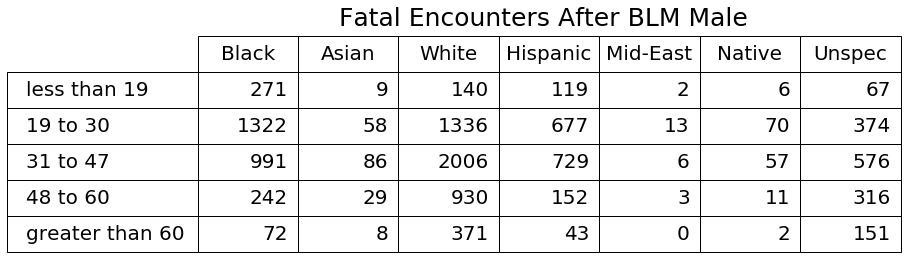

African-American/Black  =  25.771453979546465 %
Asian/Pacific Islander  =  1.6896398399288575 %
European-American/White  =  42.53445975989328 %
Hispanic/Latino  =  15.295686971987548 %
Middle Eastern  =  0.21342819030680302 %
Native American/Alaskan  =  1.2983548243663852 %
Race unspecified  =  13.196976433970653 %


In [14]:
af_male=afblm.loc[afblm['gender'] == 'Male']
temp=af_male.groupby(['age','race']).size()
minage=int(af_male['age'].min())
maxage=int(af_male['age'].max())

dic=temp.to_dict()
fullracetxt=['African-American/Black','Asian/Pacific Islander','European-American/White','Hispanic/Latino','Middle Eastern','Native American/Alaskan','Race unspecified']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
age18cnt=[0]*7
age19_30cnt=[0]*7
age31_47cnt=[0]*7
age48_60cnt=[0]*7
age61cnt=[0]*7
for i in range(minage,19):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age18cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),fullracetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),fullracetxt[j]) in dic: age61cnt[j]+=dic[(float(i),fullracetxt[j])]            
fig=plt.figure()
plt.suptitle('Fatal Encounters After BLM Male',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Mid-East','Native','Unspec']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)
# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
sumage=[]
sumrac=[0]*7

af_male_percent=[0]*7
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(fullracetxt)):
    print(fullracetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    af_male_percent[i]=(sumrac[i]/sum(sumrac))*100

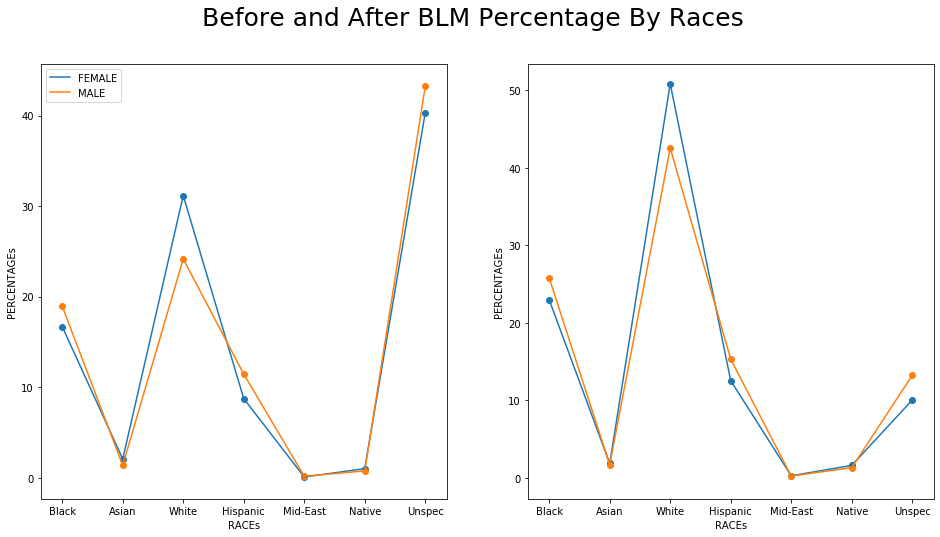

In [15]:
plt.figure(figsize=(16,8))
plt.suptitle('Before and After BLM Percentage By Races',fontsize=25)
ax=plt.subplot(121)
ax.scatter(racetxt,bf_female_percent)
ax.plot(racetxt,bf_female_percent)
ax.scatter(racetxt,bf_male_percent)
ax.plot(racetxt,bf_male_percent)
ax.legend(['FEMALE', 'MALE'])
ax.set_ylabel('PERCENTAGEs')
ax.set_xlabel('RACEs')
ax=plt.subplot(122)
ax.scatter(racetxt,af_female_percent)
ax.plot(racetxt,af_female_percent)
ax.scatter(racetxt,af_male_percent)
ax.plot(racetxt,af_male_percent)
ax.set_ylabel('PERCENTAGEs')
ax.set_xlabel('RACEs')
plt.show()

Note: the percentage of black people compares between before and after BLM is not significantly different. While the white people is significantly high after BLM. 
The interesting of this chart is male and female are looks similar pattern.

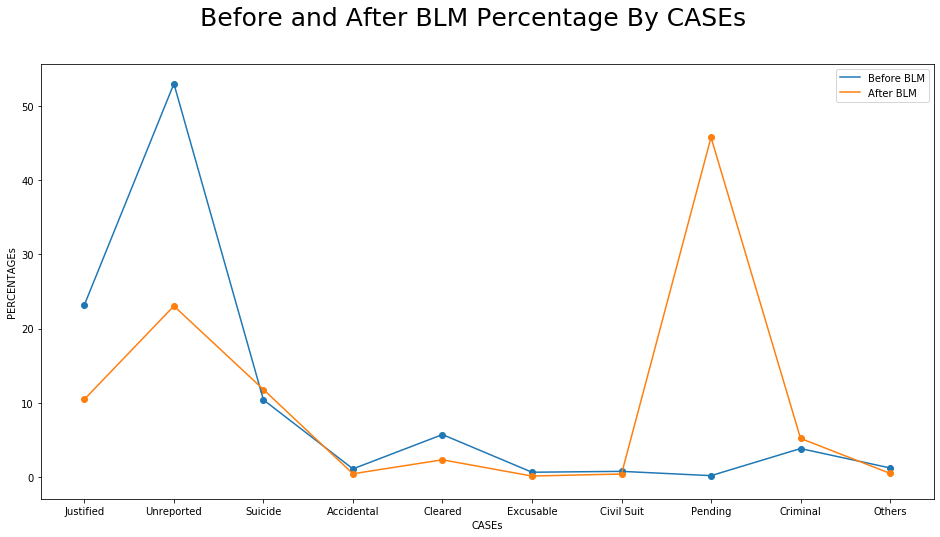

In [18]:
caserpt_txt=['Justified','Unreported','Suicide/Murder','Accidental','Grand Jury/Cleared','Excusable','Civil Suit','Pending Investigation','Criminal','Others']
bf_de=bfblm['de'].value_counts()
bf_decnt=[0]*len(caserpt_txt)
for i in bf_de.index:
    if ('justified' in i) or ('Justified' in i) or ('Justified' in i):
        bf_decnt[0]+=bf_de[i]
        bf_de[i]=0
    if ('Unreported' in i) or ('Unknown' in i):
        bf_decnt[1]+=bf_de[i]
        bf_de[i]=0
    if ('Suicide' in i) or ('suicide' in i):
        bf_decnt[2]+=bf_de[i]
        bf_de[i]=0
    if ('Accidental' in i) or ('accidental' in i):
        bf_decnt[3]+=bf_de[i]
        bf_de[i]=0
    if ('Jury' in i) or ('jury' in i) or ('Cleared' in i) or ('cleared' in i):
        bf_decnt[4]+=bf_de[i]
        bf_de[i]=0
    if ('Excusable' in i) or ('excusable' in i):
        bf_decnt[5]+=bf_de[i]
        bf_de[i]=0
    if ('Civil' in i) or ('civil' in i):
        bf_decnt[6]+=bf_de[i]
        bf_de[i]=0
    if ('Pending' in i) or ('pending' in i):
        bf_decnt[7]+=bf_de[i]
        bf_de[i]=0
    if ('Criminal' in i) or ('criminal' in i):
        bf_decnt[8]+=bf_de[i]
        bf_de[i]=0
for i in bf_de:
    if i>0: bf_decnt[9]+=i
#print(caserpt_txt)
#print(bf_decnt)
bf_percent=[]
for i in range(len(caserpt_txt)):
    #print(caserpt_txt[i],' = ',(bf_decnt[i]/sum(bf_decnt))*100,'%')
    bf_percent.append((bf_decnt[i]/sum(bf_decnt))*100)
#print(bf_percent)
   
af_de=afblm['de'].value_counts()
af_decnt=[0]*len(caserpt_txt)
for i in af_de.index:
    if ('justified' in i) or ('Justified' in i) or ('Justified' in i):
        af_decnt[0]+=af_de[i]
        af_de[i]=0
    if ('Unreported' in i) or ('Unknown' in i):
        af_decnt[1]+=af_de[i]
        af_de[i]=0
    if ('Suicide' in i) or ('suicide' in i):
        af_decnt[2]+=af_de[i]
        af_de[i]=0
    if ('Accidental' in i) or ('accidental' in i):
        af_decnt[3]+=af_de[i]
        af_de[i]=0
    if ('Jury' in i) or ('jury' in i) or ('Cleared' in i) or ('cleared' in i):
        af_decnt[4]+=af_de[i]
        af_de[i]=0
    if ('Excusable' in i) or ('excusable' in i):
        af_decnt[5]+=af_de[i]
        af_de[i]=0
    if ('Civil' in i) or ('civil' in i):
        af_decnt[6]+=af_de[i]
        af_de[i]=0
    if ('Pending' in i) or ('pending' in i):
        af_decnt[7]+=af_de[i]
        af_de[i]=0
    if ('Criminal' in i) or ('criminal' in i):
        af_decnt[8]+=af_de[i]
        af_de[i]=0
for i in af_de:
    if i>0: af_decnt[9]+=i
#print(caserpt_txt)
#print(af_decnt)
af_percent=[]
for i in range(len(caserpt_txt)):
    #print(caserpt_txt[i],' = ',(af_decnt[i]/sum(af_decnt))*100,'%')
    af_percent.append((af_decnt[i]/sum(af_decnt))*100)
#print(af_percent)

caserpt_txt=['Justified','Unreported','Suicide','Accidental','Cleared','Excusable','Civil Suit','Pending','Criminal','Others']
plt.figure(figsize=(16,8))
plt.suptitle('Before and After BLM Percentage By CASEs',fontsize=25)
ax=plt.subplot(111)
ax.scatter(caserpt_txt,bf_percent)
ax.plot(caserpt_txt,bf_percent)
ax.scatter(caserpt_txt,af_percent)
ax.plot(caserpt_txt,af_percent)
ax.legend(['Before BLM', 'After BLM'])
ax.set_ylabel('PERCENTAGEs')
ax.set_xlabel('CASEs')
plt.show()

In [19]:
from scipy.stats import poisson
from scipy.stats import chisquare

yr2018=afblm.loc[afblm['year'] == 2018]
temp=yr2018.groupby(['date']).size()
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=365-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/365
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*365 for i in pi]
print('2018')
print("Number of Events ",x)
print("Number of Days   ",oi)
print()
oi=[(oi[0]+oi[1]),oi[2],oi[3],oi[4],oi[5],oi[6],oi[7],oi[8],oi[9],oi[10],(oi[11]+oi[12]+oi[13])]
ei=[(ei[0]+ei[1]),ei[2],ei[3],ei[4],ei[5],ei[6],ei[7],ei[8],ei[9],ei[10],(ei[11]+ei[12]+ei[13])]
print(oi)
print(ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)

mu = 5.065753424657534
2018
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Number of Days    [6, 13, 42, 50, 49, 62, 43, 37, 27, 12, 15, 5, 2, 2]

[19, 42, 50, 49, 62, 43, 37, 27, 12, 15, 9]
[13.968470583055595, 29.547599459121315, 49.893617716817644, 63.18719120438068, 64.01814604761638, 54.0500237634898, 39.11487042610279, 24.768286102008233, 13.941114460460659, 7.062224832162118, 5.160273558684878]
Chi Square = 24.93328612090825 p-value = 0.00547340435735329


In [163]:
yr2019=afblm.loc[afblm['year'] == 2019]
temp=yr2019.groupby(['date']).size()
print(365-len(temp))
print(max(temp))
print(min(temp))

4
14
1
